In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

from astropy.io import fits
from cut_resize_tools import *
from tqdm import tqdm
from Make_Data_Tools import resize

In [3]:
fits_path = "/home/filament/fujimoto/fits/Cygnus_sp16_vs-40_ve040_dv0.25_12CO_Tmb.fits"
hdu = fits.open(fits_path)[0]

In [8]:
print(len(np.isnan(hdu.data)))
print(hdu.data.shape)

320
(320, 1593, 2520)


In [3]:
raw_data = hdu.data
header = hdu.header
flattened_data = raw_data.flatten()

In [4]:
vsmooth = 5
thresh = 1
sigma = 1
sch_rms = 10
ech_rms = 90
sch_ii = 121
ech_ii = 241
percentile = 99.998
sigma_multiply = 15

cut_size_list = [256, 128, 64]
integrate_layer_num = 30
obj_size = 100
obj_sig = 7.5
maximum_mode = "percentile"
integrate_layer_num = 30

In [5]:
process_data = process_data_segment(raw_data, vsmooth, sch_rms, ech_rms, sch_ii, ech_ii, sigma, thresh, integrate_layer_num)
process_data = gaussian_filter(process_data)

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [6]:
print(np.nanmax(raw_data))
print(np.nanstd(process_data))
print(process_data.max())

125987.35
11.595811163578558
27136.413837080636


In [11]:
cutoff = np.nanpercentile(process_data, 99.997)
print(cutoff)

157.37248635377986


In [8]:
# データを一次元化（NaNを除外）
flattened_data = process_data.flatten()
flattened_data = flattened_data[~np.isnan(flattened_data)]

# 90〜100パーセンタイルを0.1刻みで評価
percentiles = np.arange(99.9, 101, 0.001)
percentiles = percentiles[percentiles <= 100]  # 100を超える値を除外
cutoff_values = np.percentile(flattened_data, percentiles)

In [9]:
percentile_dic = {}
for i, v in zip(percentiles, cutoff_values):
    percentile_dic[round(i, 3)] = v

print(percentile_dic[99.998])

204.85498134497837


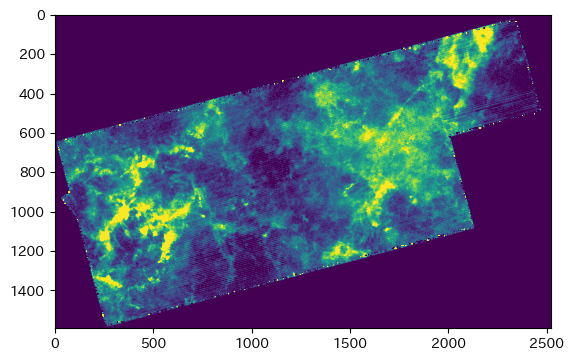

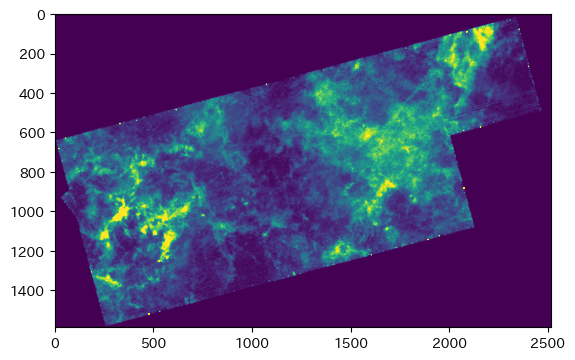

In [10]:
plt.imshow(np.sum(select_v, axis=0), vmin=0, vmax=500)
plt.show()

plt.imshow(np.sum(conv_data, axis=0), vmin=0, vmax=500)
plt.show()

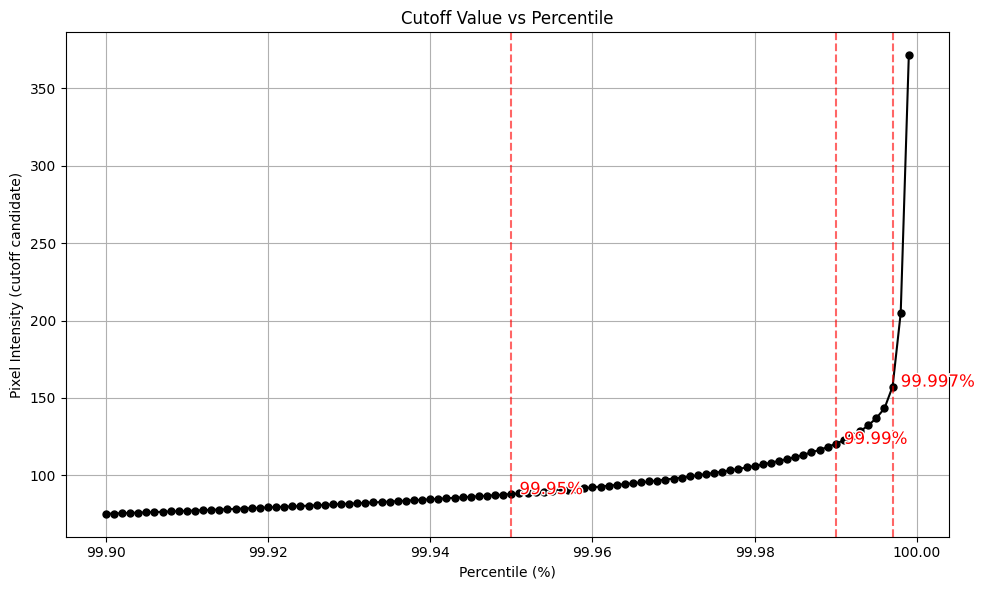

In [15]:
# プロット
plt.figure(figsize=(10, 6))
plt.plot(percentiles, cutoff_values, marker='o', color='k', markersize=5)
plt.xlabel("Percentile (%)")
plt.ylabel("Pixel Intensity (cutoff candidate)")
plt.title("Cutoff Value vs Percentile")
plt.grid(True)

# 垂直線で参考ラインを追加
for p in [99.95, 99.99, 99.997]:
    plt.axvline(p, color='r', linestyle='--', alpha=0.6)
    # plt.text(p + 0.01, np.percentile(flattened_data, p), f'{p}%', color='red', edge="k")
    text = plt.text(p + 0.001, np.percentile(flattened_data, p), f'{p}%', color='r', fontsize=12)
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='w'),  # 縁取り色
        path_effects.Normal()  # 通常の描画
    ])
    
plt.tight_layout()
plt.savefig("Cutoff_Value_vs_Percentile_processed")
plt.show()

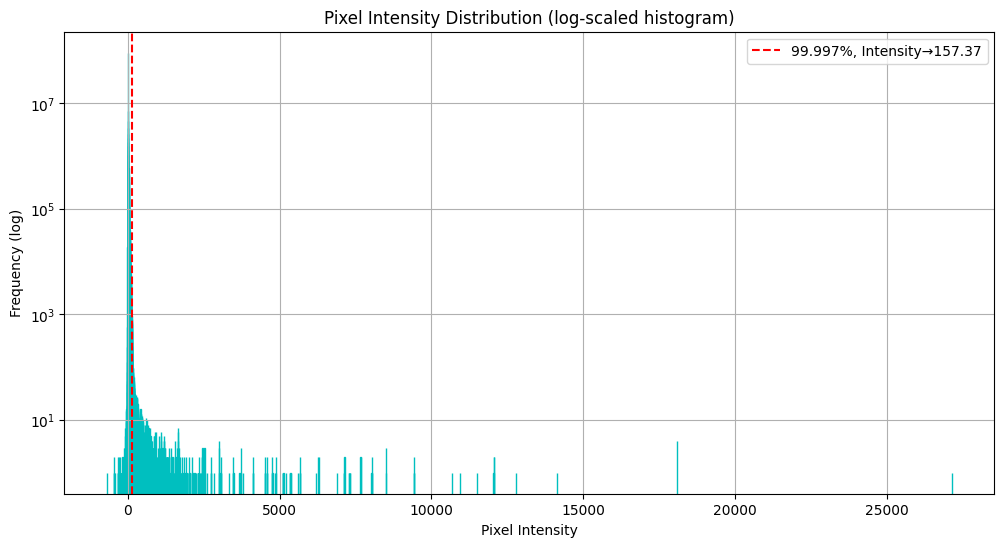

In [16]:
bins = 10000  # ビンの数


test_hist, test_edges = np.histogram(flattened_data, bins=bins, range=(np.nanmin(flattened_data), np.nanmax(flattened_data)))

fig, axes = plt.subplots(1, 1, figsize=(12, 6))

axes.set_yscale('log')  # y軸をログスケールに設定
axes.bar(test_edges[:-1], test_hist, width=np.diff(test_edges), color="c", edgecolor='c', align='edge')
axes.set_xlabel("Pixel Intensity")
axes.set_ylabel("Frequency (log)")
axes.set_title("Pixel Intensity Distribution (log-scaled histogram)")

# axes.legend([f'total strength: {flattened_test_data.sum():.1f}'])
# axes.set_xlim(0, 1)
# axes.set_ylim(0.5, 1e7)
plt.axvline(percentile_dic[99.997], color='red', linestyle='--', label=f'99.997%, Intensity→{percentile_dic[99.997]:.2f}')
plt.legend()
axes.grid(True)

plt.savefig("all_region_hist_processed")
plt.show()

In [22]:
threshold = percentile_dic[99.998]

clipped_data = np.clip(conv_data, None, threshold)
print(np.max(clipped_data))  # 出力: [1 5 7 7 7]

146.8754097547437


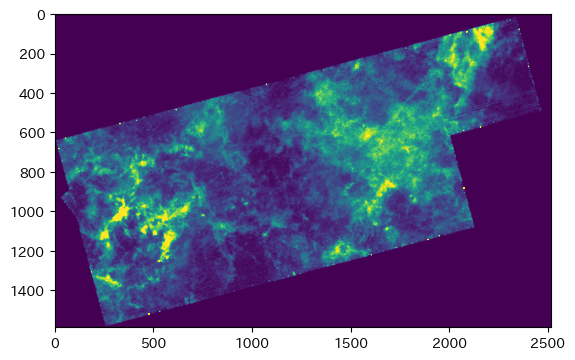

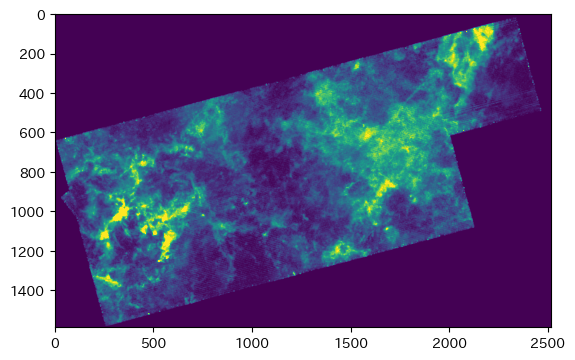

In [24]:
plt.imshow(np.sum(conv_data, axis=0), vmin=0, vmax=500)
plt.show()

plt.imshow(np.sum(clipped_data, axis=0), vmin=0, vmax=500)
plt.show()

In [19]:
print(np.percentile(flattened_data, 99.998))

146.87540973375985
